# Constructing KAZE Keypoints and Feature Descriptor
### Compares how similar images are by matching Descriptors and comparing the results

In [2]:
import cv2 as cv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline

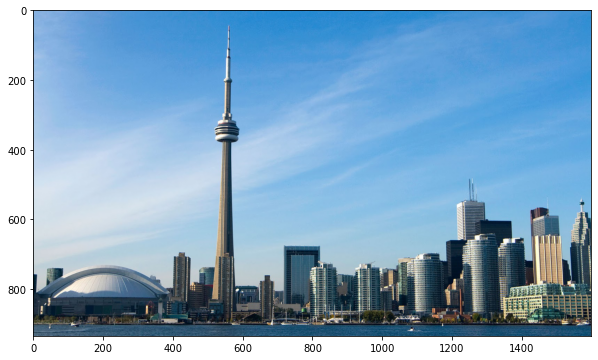

In [3]:
img_file = 'data/cn-tower-1.jpg'

img = cv.imread(img_file)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img);

### Computing KAZE keypoints and feature descriptor
Outputted below is an example of the keypoints found

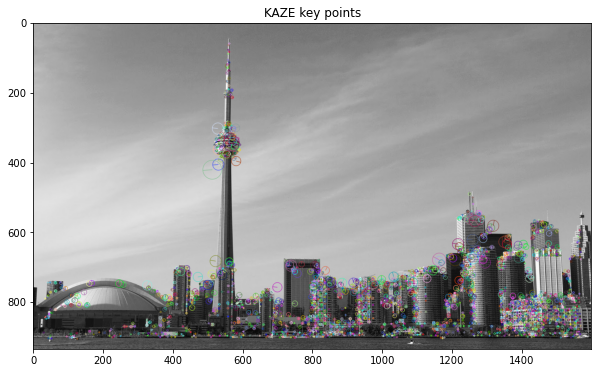

In [4]:
img = cv.imread(img_file)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
src = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

akaze = cv.AKAZE_create()
kp, desc = akaze.detectAndCompute(img, None)

img = cv.drawKeypoints(src, kp, img, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.title('KAZE key points')
plt.imshow(img);

# Comparing Multiple Images by their Keypoint Desciptors
<b>Below We are: </b> <br>
-Constructing an image triplet with 
'data/cn-tower-1.jpg'
'data/cn-tower-2.jpg'
'data/eiffel-tower.jpeg' <br>
-Computing KAZE keypoints and features for each image<br>
-Matching descriptors between image pairs and recording the fraction of "good" matches <br>
-Using good match counts to decide which two images are closer to each other <br>

In [5]:
img1 = cv.imread('data/cn-tower-1.jpg')
img2 = cv.imread('data/cn-tower-2.jpg')
img3 = cv.imread('data/eiffel-tower.jpeg')

img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)
img2 = cv.cvtColor(img2, cv.COLOR_BGR2RGB)
img3 = cv.cvtColor(img3, cv.COLOR_BGR2RGB)
src1 = cv.cvtColor(img1, cv.COLOR_RGB2GRAY)
src2 = cv.cvtColor(img2, cv.COLOR_RGB2GRAY)
src3 = cv.cvtColor(img3, cv.COLOR_RGB2GRAY)
src_array = [src1, src2, src3]

akaze = cv.AKAZE_create()
kp1, desc1 = akaze.detectAndCompute(src1, None)
kp2, desc2 = akaze.detectAndCompute(src2, None)
kp3, desc3 = akaze.detectAndCompute(src3, None)
kp_array = [kp1, kp2, kp3]

#Uncomment to see visual representation of Keypoints found
'''
img1_1 = cv.drawKeypoints(src1, kp1, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_1 = cv.drawKeypoints(src2, kp2, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img3_1 = cv.drawKeypoints(src3, kp3, img3, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.figure(figsize=(10,10))
plt.title('KAZE key points')
plt.imshow(img1);
'''



"\nimg1_1 = cv.drawKeypoints(src1, kp1, img1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)\nimg2_1 = cv.drawKeypoints(src2, kp2, img2, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)\nimg3_1 = cv.drawKeypoints(src3, kp3, img3, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)\nplt.figure(figsize=(10,10))\nplt.title('KAZE key points')\nplt.imshow(img1);\n"

Comparing 1 & 2:  130 --> Match/Good Match Ratio:  130/2918 or  0.04455106237148732
Comparing 1 & 3:  56 --> Match/Good Match Ratio:  56/2918 or 0.019191226867717615
Comparing 2 & 3:  17 --> Match/Good Match Ratio:  17/725 or 0.023448275862068966
Therefore Image 1 & 2 are closest, 1 & 3 are next closest, and 2 & 3 are farthest


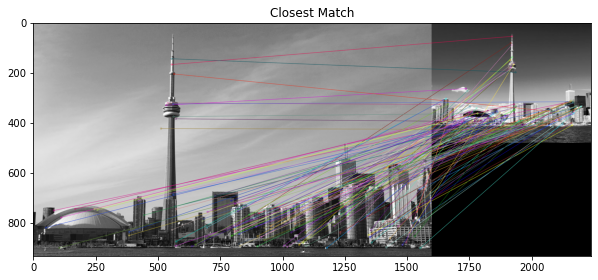

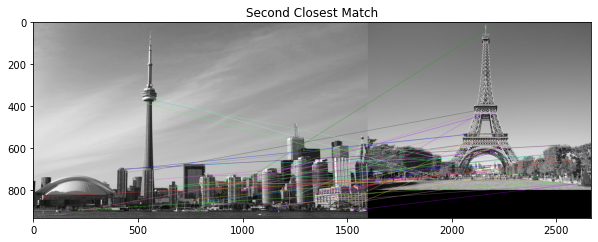

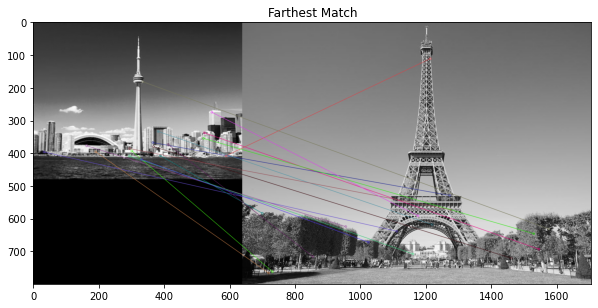

In [8]:
FLANN_INDEX_LSH = 6
index_params = dict(algorithm = FLANN_INDEX_LSH, table_number = 6)
search_params = dict(checks=50)
flann = cv.FlannBasedMatcher(index_params, search_params)

matches1_2 = flann.knnMatch(desc1, desc2, k=2)
matches1_3 = flann.knnMatch(desc1, desc3, k=2)
matches2_3 = flann.knnMatch(desc2, desc3, k=2)

good = []
ratio_threshold = 0.75
for current_matches in [matches1_2, matches1_3, matches2_3]:
    
    current_good = np.array([])
    for match in current_matches:
        if len(match) < 2: continue
        m, n = match[0], match[1]
        
        if m.distance < ratio_threshold*n.distance:
            current_good = np.append([current_good],[m])
            
    good.append([current_good])
    
print("Comparing 1 & 2: ", good[0][0].shape[0], "--> Match/Good Match Ratio: ", str(good[0][0].shape[0]) + "/" + str(len(matches1_2)), "or ", good[0][0].shape[0] / len(matches1_2))
print("Comparing 1 & 3: ",good[1][0].shape[0], "--> Match/Good Match Ratio: ", str(good[1][0].shape[0]) + "/" + str(len(matches1_3)), "or", good[1][0].shape[0] / len(matches1_3))
print("Comparing 2 & 3: ",good[2][0].shape[0], "--> Match/Good Match Ratio: ", str(good[2][0].shape[0]) + "/" + str(len(matches2_3)), "or", good[2][0].shape[0] / len(matches2_3))
print("Therefore Image 1 & 2 are closest, 1 & 3 are next closest, and 2 & 3 are farthest")

img_out = cv.drawMatchesKnn(src1, kp1, src2, kp2, good[0], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_out2 = cv.drawMatchesKnn(src1, kp1, src3, kp3, good[1], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
img_out3 = cv.drawMatchesKnn(src2, kp2, src3, kp3, good[2], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10,10))
plt.title("Closest Match")
plt.imshow(img_out)
plt.show()
plt.figure(figsize=(10,10))
plt.title("Second Closest Match")
plt.imshow(img_out2)
plt.show()
plt.figure(figsize=(10,10))
plt.title("Farthest Match")
plt.imshow(img_out3)
plt.show()

      


# Picking out correct pair of images after partially corrupting the images (Drawing shapes on the image)


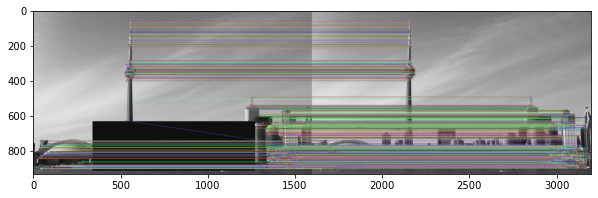

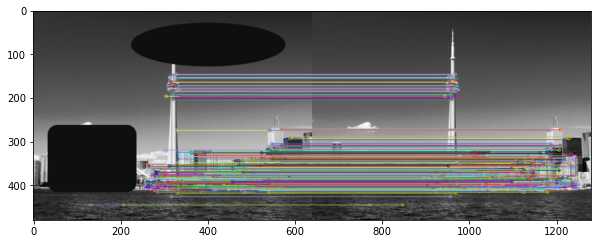

In [9]:
img_corrupted1 = cv.imread('data/cn-tower-1-corrupted.jpg')
img_corrupted2 = cv.imread('data/cn-tower-2-corrupted.jpg')

img_corrupted1 = cv.cvtColor(img_corrupted1, cv.COLOR_BGR2RGB)
img_corrupted2 = cv.cvtColor(img_corrupted2, cv.COLOR_BGR2RGB)

src_corrupted1 = cv.cvtColor(img_corrupted1, cv.COLOR_RGB2GRAY)
src_corrupted2 = cv.cvtColor(img_corrupted2, cv.COLOR_RGB2GRAY)

kp_c1, desc_c1 = akaze.detectAndCompute(src_corrupted1, None)
kp_c2, desc_c2 = akaze.detectAndCompute(src_corrupted2, None)


#First Picture Detection
matches_c1_1 = flann.knnMatch(desc_c1, desc1, k=2)
matches_c1_2 = flann.knnMatch(desc_c1, desc2, k=2)
matches_c1_3 = flann.knnMatch(desc_c1, desc3, k=2)



good = []
ratio_threshold = 0.75
for current_matches in [matches_c1_1, matches_c1_2, matches_c1_3]:
    
    current_good = np.array([])
    for match in current_matches:
        if len(match) < 2: continue
        m, n = match[0], match[1]
        
        if m.distance < ratio_threshold*n.distance:
            current_good = np.append([current_good],[m])
            
    good.append([current_good])
 
max_num = np.array([])
for i in range(3):
    max_num = np.append(max_num, good[i][0].shape)
    #print(max_num)
max_val = np.argmax(max_num)

img_out_c1 = cv.drawMatchesKnn(src_corrupted1, kp_c1, src_array[max_val], kp_array[max_val], good[max_val], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10,10))
plt.imshow(img_out_c1)
plt.show()


#Second Picture Detection
matches_c2_1 = flann.knnMatch(desc_c2, desc1, k=2)
matches_c2_2 = flann.knnMatch(desc_c2, desc2, k=2)
matches_c2_3 = flann.knnMatch(desc_c2, desc3, k=2)



good = []
ratio_threshold = 0.75
for current_matches in [matches_c2_1, matches_c2_2, matches_c2_3]:
    
    current_good = np.array([])
    for match in current_matches:
        if len(match) < 2: continue
        m, n = match[0], match[1]
        
        if m.distance < ratio_threshold*n.distance:
            current_good = np.append([current_good],[m])
            
    good.append([current_good])
 
max_num = np.array([])
for i in range(3):
    max_num = np.append(max_num, good[i][0].shape)
    #print(max_num)
max_val = np.argmax(max_num)

img_out_c2 = cv.drawMatchesKnn(src_corrupted2, kp_c2, src_array[max_val], kp_array[max_val], good[max_val], None, flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(10,10))
plt.imshow(img_out_c2)
plt.show()

### The corrupted Images above are successfull matched